In [ ]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
warnings.filterwarnings('ignore')
df = pd.read_csv('international_matches.csv', error_bad_lines=False)
df.head()
# df.shape
#df.info


,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Data Pre-Processing**


Handling Null Values

In [ ]:
##teams thats are participaing
wc_2022 = ['Ecuador', 'Senegal', 'Netherlands', 'England', 'IR Iran', 'USA', 'Wales', 'Argentina', 'Saudi Arabia', 'Mexico', 'Canada', 'Morocco', 'Croatia', 'Brazil', 'Serbia', 'Switzerland', 'Cameroon', 'Portugal', 'Ghana', 'Uruguay', 'Korea Republic', 'Qatar', 'Poland', 'France', 'Australia', 'Denmark', 'Tunisia', 'Spain', 'Costa Rica', 'Germany', 'Japan', 'Belgium']


##checking for Null values
null_vals = [col for col in df.columns if df[col].isnull().any()]
print(f"Columns that contain null values: \n\n {null_vals}")


for x in wc_2022:
    for y in null_vals:
        df[y].fillna(df[df['tournament']==x][y].mean(), inplace=True)


df.isnull().sum()

Columns that contain null values: 

 ['home_team_goalkeeper_score', 'away_team_goalkeeper_score', 'home_team_mean_defense_score', 'home_team_mean_offense_score', 'home_team_mean_midfield_score', 'away_team_mean_defense_score', 'away_team_mean_offense_score', 'away_team_mean_midfield_score']


date                                 0
home_team                            0
away_team                            0
home_team_continent                  0
away_team_continent                  0
home_team_fifa_rank                  0
away_team_fifa_rank                  0
home_team_total_fifa_points          0
away_team_total_fifa_points          0
home_team_score                      0
away_team_score                      0
tournament                           0
city                                 0
country                              0
neutral_location                     0
shoot_out                            0
home_team_result                     0
home_team_goalkeeper_score       15542
away_team_goalkeeper_score       15826
home_team_mean_defense_score     16134
home_team_mean_offense_score     15411
home_team_mean_midfield_score    15759
away_team_mean_defense_score     16357
away_team_mean_offense_score     15609
away_team_mean_midfield_score    15942
dtype: int64

#Analyzing Home Team Advantage

In [ ]:

home_team = df[['country', 'home_team_score', 'away_team_score']]

home_wins = home_team.loc[home_team['home_team_score'] > home_team['away_team_score']]
home_loss = home_team.loc[home_team['home_team_score'] < home_team['away_team_score']]

home_ad = home_wins[['country', 'home_team_score', 'away_team_score']].rename(columns={"home_team_score": 'Home_team_win', 'away_team_score': 'Home_team_loss'})
away_ad = home_loss[['country', 'away_team_score', 'home_team_score']].rename(columns={"away_team_score": 'Home_team_win', 'home_team_score': 'Home_team_loss'})

home_advantage = home_ad.append(away_ad)
home_advantage.head()

,country,Home_team_win,Home_team_loss
0,Bolivia,3,1
2,Ecuador,5,0
3,Guinea,1,0
6,Zimbabwe,2,0
7,Guinea,4,0


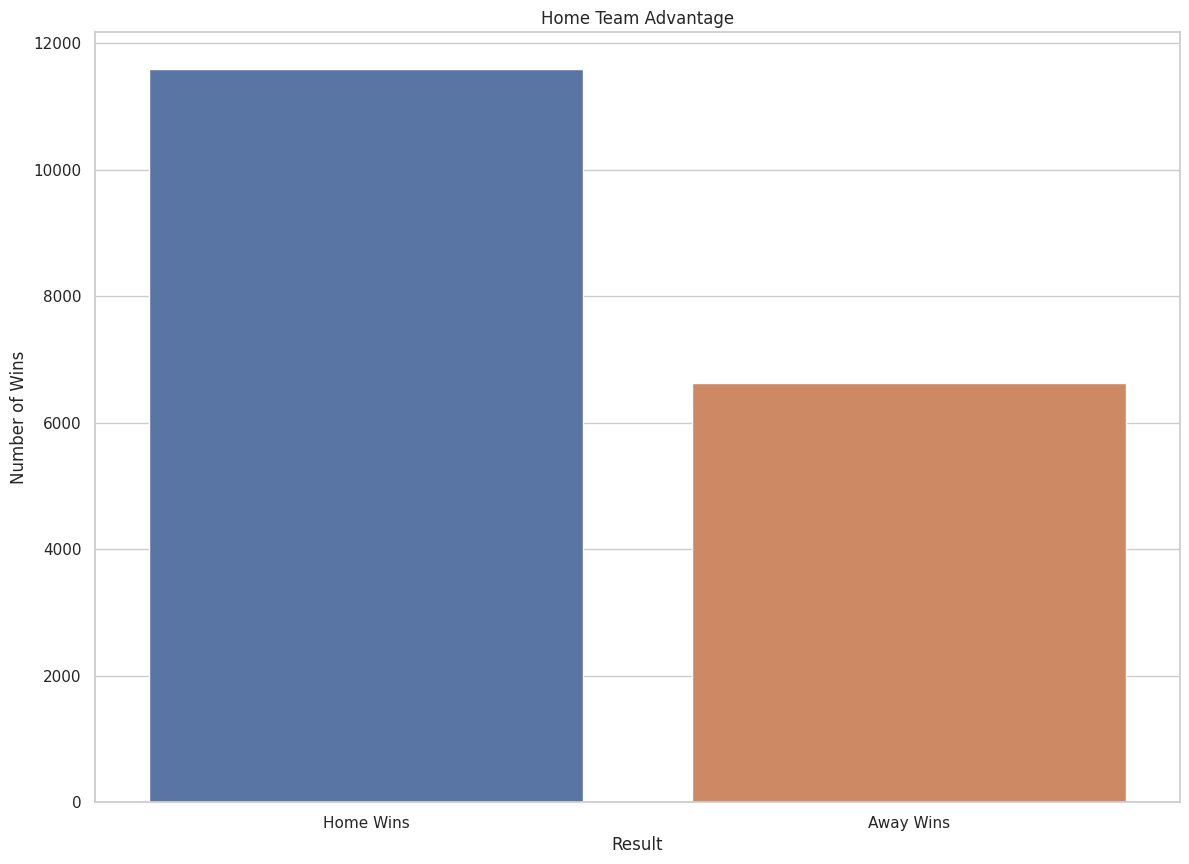

In [ ]:
data = pd.DataFrame({'Result': ['Home Wins', 'Away Wins'],'Count': [len(home_wins), len(home_loss)]})

# Plotting the bar chart
sns.barplot(x='Result', y='Count', data=data)
plt.title('Home Team Advantage')
plt.ylabel('Number of Wins')
plt.show()

#2. Which team has most wins

In [ ]:
home_team = df[['date', 'home_team', 'home_team_score', 'away_team_score']]

homewins = home_team[home_team['home_team_score'] > home_team['away_team_score']]
homeloss = home_team[home_team['home_team_score'] < home_team['away_team_score']]

home_team_wins = homewins[['date', 'home_team', 'home_team_score', 'away_team_score']].rename(columns={"home_team": 'team', 'home_team_score': 'Home_team_win', 'away_team_score': 'away_team_win'})
away_team_wins = homeloss[['date', 'home_team', 'home_team_score', 'away_team_score']].rename(columns={"home_team": 'team', 'home_team_score': 'Home_team_win', 'away_team_score': 'away_team_win'})

Team_streak = home_team_wins.append(away_team_wins)

largest_win_count = Team_streak['team'].value_counts().nlargest(1)

#Team_streak

print("Team that has the most wins is: ",largest_win_count )

Team that has the most wins is:  USA    253
Name: team, dtype: int64


#3. Winning Percentage Comparison based on Ranks

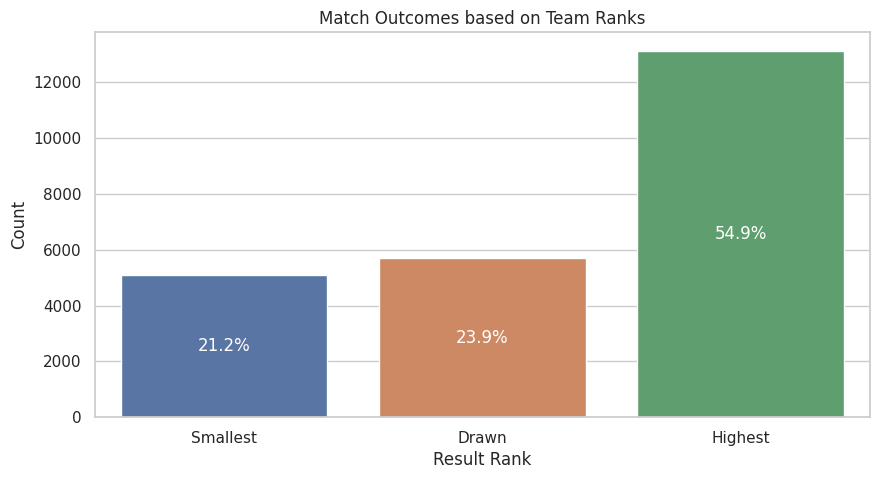

In [ ]:
def get_winner(team1_score, team2_score, team1, team2):
    return team1 if team1_score > team2_score else 'Drawn' if team1_score == team2_score else team2

def get_rank_winner(team1_rank, team2_rank, team1, team2):
    return team1 if team1_rank < team2_rank else team2

def result_rank(winner, better_rank):
    if winner == 'Drawn':
        return winner
    if winner == better_rank:
        return 'Highest'
    else:
        return 'Smallest'

df['winner'] = df.apply(lambda x: get_winner(x['home_team_score'], x['away_team_score'], x['home_team'], x['away_team']), axis=1)
df['better_rank'] = df.apply(lambda x: get_rank_winner(x['home_team_fifa_rank'], x['away_team_fifa_rank'], x['home_team'], x['away_team']), axis=1)
df['result_rank'] = df.apply(lambda x: 'Highest' if x['winner'] != 'Drawn' and x['winner'] == x['better_rank'] else 'Smallest' if x['winner'] != 'Drawn' else 'Drawn', axis=1)

plt.figure(figsize=(10, 5))
total = float(len(df))
ax = sns.countplot(x='result_rank', data=df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(percentage, (x + width / 2, y + height / 2), ha='center', va='center', fontsize=12, color='white')
plt.title('Match Outcomes based on Team Ranks')
plt.ylabel('Count')
plt.xlabel('Result Rank')
plt.show()

4. Winning Percentage Comparison based on Attacking Rate

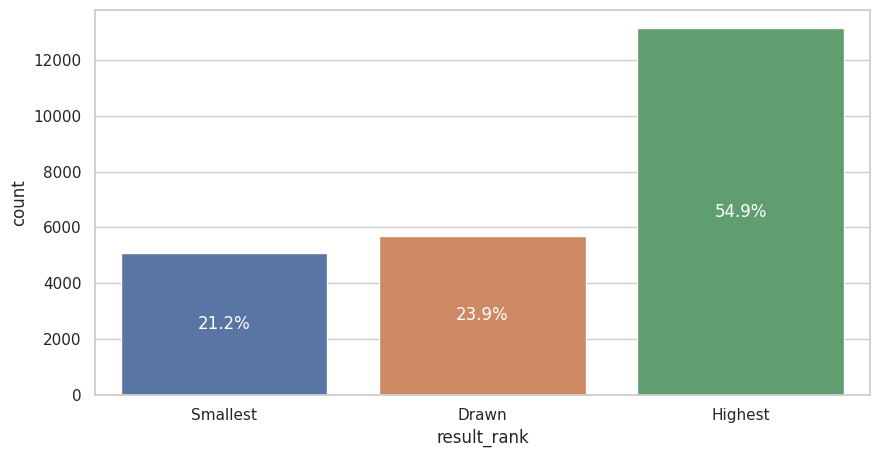

In [ ]:
df['home_team_mean_offense_score'].fillna(0, inplace=True)  # Fill null values with 0
df['away_team_mean_offense_score'].fillna(0, inplace=True)



def better_attack(home, away, offense_home, offense_away):
    if offense_home > offense_away:
        return home
    else:
        return away

df['better_attack'] = df.apply(lambda x: better_attack(x['home_team'], x['away_team'], x['home_team_mean_offense_score'], x['away_team_mean_offense_score']), axis=1)
df['result_rank'] = df.apply(lambda x: result_rank(x['winner'], x['better_rank']), axis=1)


plt.figure(figsize=(10, 5))
total = float(len(df))
ax = sns.countplot(x='result_rank', data=df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(percentage, (x + width / 2, y + height / 2), ha='center', va='center', fontsize=12, color='white')
plt.show()

#Teams with stronger offensive scores


In [ ]:
offence_score = []
for x in wc_2022:
    of_score = np.round((df[df["home_team"] == x]['home_team_mean_offense_score'].mean() + df[df["away_team"] == x]['away_team_mean_offense_score'].mean())/2, 2)
    offence_score.append(of_score)

offence_scores = pd.DataFrame({'Team':wc_2022, 'Of score': offence_score}).sort_values('Of score', ascending = False).reset_index(drop=True)
offence_scores


,Team,Of score
0,Serbia,78.26
1,Spain,57.60
2,Portugal,57.21
3,Argentina,55.76
4,England,55.32
5,Netherlands,55.10
6,France,54.28
7,Belgium,53.00
8,Uruguay,52.71
9,Wales,52.49


In [ ]:
goals = pd.DataFrame({'Team': wc_2022})
goals = goals.merge(df.groupby('home_team').away_team_score.sum().reset_index().rename(columns={'home_team': 'Team', 'away_team_score': 'Conceded goals home'}), on='Team', how='left')
goals = goals.merge(df.groupby('away_team').home_team_score.sum().reset_index().rename(columns={'away_team': 'Team', 'home_team_score': 'Conceded goals away'}), on='Team', how='left')
goals = goals.merge(df.groupby('home_team').home_team_score.sum().reset_index().rename(columns={'home_team': 'Team', 'home_team_score': 'Scored goals home'}), on='Team', how='left')
goals = goals.merge(df.groupby('away_team').away_team_score.sum().reset_index().rename(columns={'away_team': 'Team', 'away_team_score': 'Scored goals away'}), on='Team', how='left')
goals.fillna(0, inplace=True)
goals['Total scored goals'] = goals['Scored goals home'] + goals['Scored goals away']
goals['Total conceded goals'] = goals['Conceded goals home'] + goals['Conceded goals away']
goals['Goal difference'] = goals['Total scored goals'] - goals['Total conceded goals']
goals['Goal ratio'] = goals['Total scored goals'] / goals['Total conceded goals']
goals = goals.sort_values('Goal difference', ascending=False).reset_index(drop=True)
goals.index += 1

print(goals)

              Team  Conceded goals home  Conceded goals away  \
1           Brazil                  141                  159   
2            Spain                  107                  141   
3          Germany                  220                  171   
4          IR Iran                  115                  165   
5      Netherlands                  145                  142   
6           France                  154                  112   
7         Portugal                  124                  144   
8          England                  132                  119   
9            Japan                  273                  153   
10          Mexico                  272                  247   
11       Australia                  127                  164   
12       Argentina                  140                  192   
13             USA                  261                  191   
14    Saudi Arabia                  239                  246   
15  Korea Republic                  202 

In [ ]:
offence_players_vs_goals_scored = offence_scores.merge(goals, on='Team')[['Team', 'Of score', 'Total scored goals']]
offence_players_vs_goals_scored['Total scored goals/Gk score'] = offence_players_vs_goals_scored['Total scored goals'] / offence_players_vs_goals_scored['Of score']
offence_players_vs_goals_scored = offence_players_vs_goals_scored.sort_values('Total scored goals/Gk score', ascending=False).reset_index(drop=True)
offence_players_vs_goals_scored.index += 1
print(offence_players_vs_goals_scored)

              Team  Of score  Total scored goals  Total scored goals/Gk score
1            Qatar      0.00                 598                          inf
2     Saudi Arabia     18.72                 762                    40.705128
3          IR Iran     22.50                 713                    31.688889
4           Brazil     48.87                 954                    19.521179
5            Japan     42.53                 776                    18.245944
6           Mexico     47.69                 858                    17.991193
7          Germany     51.44                 875                    17.010109
8              USA     46.46                 761                    16.379681
9   Korea Republic     44.38                 685                    15.434881
10           Spain     57.60                 781                    13.559028
11         Tunisia     43.13                 550                    12.752145
12     Netherlands     55.10                 700                

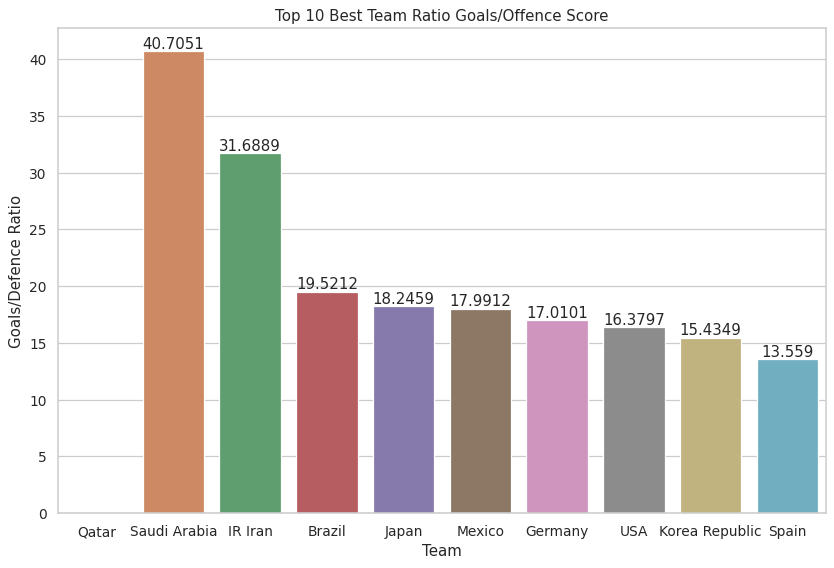

In [ ]:
plt.figure(figsize=(11, 7), dpi=90)
ax = sns.barplot(data=offence_players_vs_goals_scored[:10], x='Team', y='Total scored goals/Gk score')
ax.bar_label(ax.containers[0])
plt.xlabel('Team')
plt.ylabel('Goals/Defence Ratio')
plt.title('Top 10 Best Team Ratio Goals/Offence Score')
plt.show()

#Teams with stronger goalkeepers

In [ ]:
home_gk_scores = df[df['home_team'].isin(wc_2022)].groupby('home_team')['home_team_goalkeeper_score'].mean().reset_index()
away_gk_scores = df[df['away_team'].isin(wc_2022)].groupby('away_team')['away_team_goalkeeper_score'].mean().reset_index()
home_gk_scores.rename(columns={'home_team': 'Team', 'home_team_goalkeeper_score': 'Home_Gk_Score'}, inplace=True)
away_gk_scores.rename(columns={'away_team': 'Team', 'away_team_goalkeeper_score': 'Away_Gk_Score'}, inplace=True)
merged_gk_scores = pd.merge(home_gk_scores, away_gk_scores, on='Team')
merged_gk_scores['Gk_Score'] = np.round((merged_gk_scores['Home_Gk_Score'] + merged_gk_scores['Away_Gk_Score']) / 2, decimals=2)
goalkeeper_scores = merged_gk_scores[['Team', 'Gk_Score']].sort_values('Gk_Score', ascending=False)
goalkeeper_scores.index = np.arange(1, len(goalkeeper_scores) + 1)
print(goalkeeper_scores)


              Team  Gk_Score
1          Germany     89.02
2            Spain     88.78
3           France     86.86
4           Brazil     86.28
5          England     83.25
6      Netherlands     83.23
7          Belgium     82.41
8           Poland     82.10
9         Portugal     81.81
10             USA     81.12
11       Argentina     80.70
12     Switzerland     80.22
13         Denmark     79.66
14         Uruguay     79.37
15          Mexico     79.18
16         Croatia     78.67
17      Costa Rica     78.60
18       Australia     78.36
19        Cameroon     77.66
20          Serbia     76.48
21  Korea Republic     73.84
22           Wales     73.80
23         Senegal     72.38
24          Canada     72.08
25         Morocco     71.98
26         Ecuador     71.42
27    Saudi Arabia     70.92
28           Japan     70.30
29         IR Iran     68.39
30           Ghana     68.19
31         Tunisia     64.37
32           Qatar       NaN


In [ ]:
goalkeeper_vs_goals_conceded = goalkeeper_scores.merge(goals, on='Team')[['Team', 'Gk_Score', 'Total conceded goals']]
goalkeeper_vs_goals_conceded['Concided goals/Gk score Ratio'] = goalkeeper_vs_goals_conceded['Total conceded goals'] / goalkeeper_vs_goals_conceded['Gk_Score']
goalkeeper_vs_goals_conceded = goalkeeper_vs_goals_conceded.sort_values('Concided goals/Gk score Ratio', ascending=False).reset_index(drop=True)
goalkeeper_vs_goals_conceded.index += 1
goalkeeper_vs_goals_conceded

,Team,Gk_Score,Total conceded goals,Concided goals/Gk score Ratio
1,Saudi Arabia,70.92,485,6.838691
2,Mexico,79.18,519,6.554686
3,Japan,70.30,426,6.059744
4,Costa Rica,78.60,473,6.017812
5,Ecuador,71.42,414,5.796696
6,Korea Republic,73.84,413,5.593174
7,USA,81.12,452,5.571992
8,Ghana,68.19,349,5.118053
9,Tunisia,64.37,329,5.111077
10,Uruguay,79.37,383,4.825501


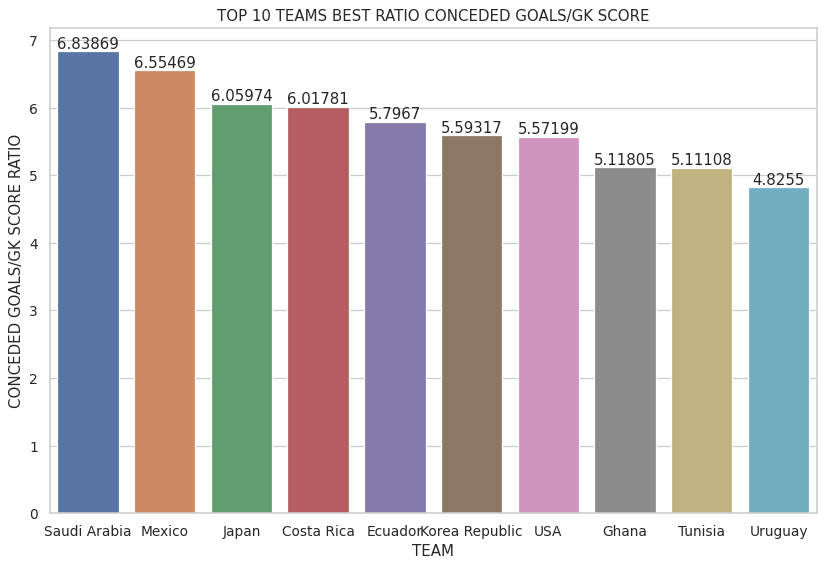

In [ ]:
plt.figure(figsize=(11, 7), dpi=90)
ax = sns.barplot(data=goalkeeper_vs_goals_conceded[:10], x='Team', y='Concided goals/Gk score Ratio')
ax.bar_label(ax.containers[0])
plt.xlabel('TEAM')
plt.ylabel('CONCEDED GOALS/GK SCORE RATIO')
plt.title('TOP 10 TEAMS BEST RATIO CONCEDED GOALS/GK SCORE')
plt.show()


#Top 10 teams with the longest win streak

In [ ]:
def calculate_streak(team_data, team):
    team_data['wins'] = np.where(
        ((team_data['home_team'] == team) & (team_data['home_team_result'] == 'Win')) |
        ((team_data['away_team'] == team) & (team_data['home_team_result'] == 'Lose')),
        1, 0
    )
    team_data['start_of_streak'] = team_data['wins'].ne(team_data['wins'].shift())
    team_data['streaks_id'] = team_data['start_of_streak'].cumsum()
    team_data['streak_counter'] = team_data.groupby('streaks_id').cumcount() + 1
    return team_data[team_data['wins'] == 1]['streak_counter'].max()

streaks = [calculate_streak(df[(df['home_team'] == team) | (df['away_team'] == team)], team) for team in wc_2022]
Streaks = pd.DataFrame({'Team': wc_2022, 'Streak': streaks})
Streaks = Streaks.sort_values('Streak', ascending=False).reset_index(drop=True)
Streaks.index += 1
Streaks


,Team,Streak
1,Spain,25
2,France,14
3,Brazil,14
4,Australia,13
5,Morocco,12
6,Belgium,12
7,Saudi Arabia,11
8,USA,11
9,IR Iran,10
10,Netherlands,10


Text(0.5, 1.0, 'top 10 teams with the longest win streak')

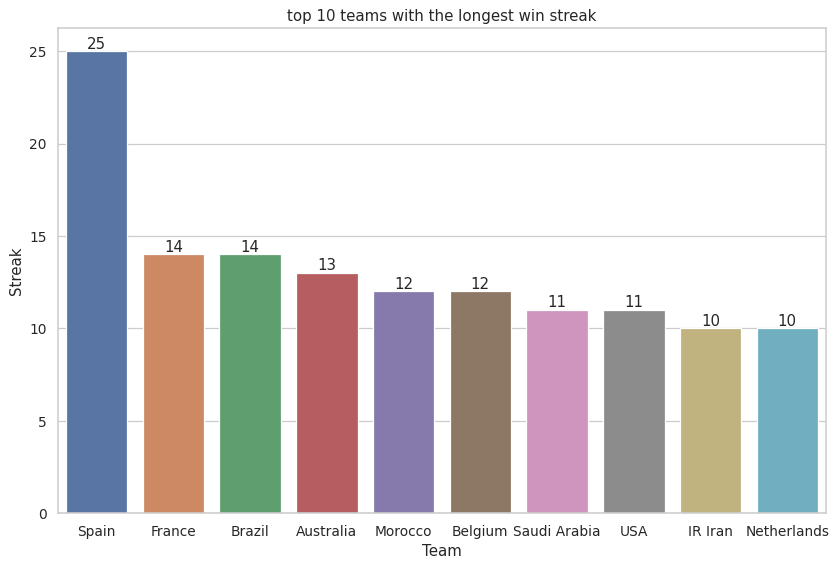

In [ ]:
plt.figure(figsize=(11, 7), dpi=90)
ax = sns.barplot(data=Streaks[:10], x='Team', y='Streak')
ax.bar_label(ax.containers[0])
plt.xlabel('Team')
plt.ylabel('Streak')
plt.title('top 10 teams with the longest win streak')

#win percentage as a home team or away team

In [ ]:
away_team_better_rank = df[(df['home_team_fifa_rank'] > df['away_team_fifa_rank'])] ['home_team_result'].value_counts()
away_team_better_rank

Lose    4984
Win     3429
Draw    2840
Name: home_team_result, dtype: int64

In [ ]:
home_team_better_rank = df[(df['home_team_fifa_rank'] < df['away_team_fifa_rank'])] ['home_team_result'].value_counts()
home_team_better_rank

Win     8313
Draw    2542
Lose    1781
Name: home_team_result, dtype: int64

In [ ]:
away_team_better_rank_wins_percent = np.round(100 * away_team_better_rank[0] / (away_team_better_rank[0] + home_team_better_rank[0]), 2)
home_team_better_rank_wins_percent = np.round(100 * home_team_better_rank[0] / (away_team_better_rank[0] + home_team_better_rank[0]), 2)
better_team_win_percent = pd.DataFrame({'win percent': [home_team_better_rank_wins_percent, away_team_better_rank_wins_percent, np.round(100 * (away_team_better_rank[0] + home_team_better_rank[0]) / (away_team_better_rank[0] + home_team_better_rank[0]), 2)]}, index=['home', 'away', 'total'])
better_team_win_percent

,win percent
home,62.52
away,37.48
total,100.00


Text(0.5, 1.0, 'Better team win per')

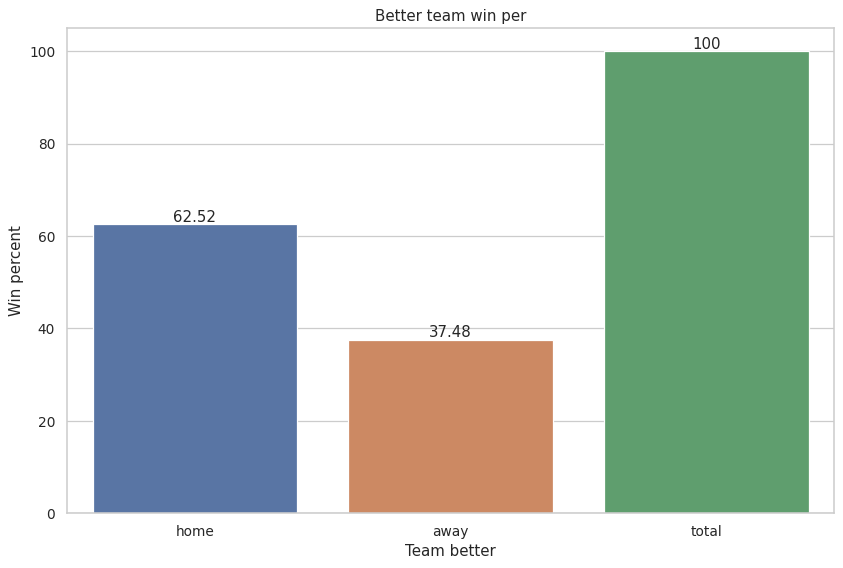

In [ ]:
plt.figure(figsize=(11,7), dpi =90)
ax = sns.barplot(data= better_team_win_percent, x=better_team_win_percent.index, y = 'win percent')
ax.bar_label(ax.containers[0])
plt.xlabel('Team better')
plt.ylabel('Win percent')
plt.title('Better team win per')

In [ ]:
ranks = []

for x in wc_2022:
    rank_df = df[(df['home_team'] == x) | (df['away_team'] == x)].sort_values(['date', 'home_team_fifa_rank'])
    if (rank_df['home_team'] == x).any():
        rank = rank_df['home_team_fifa_rank'].values[0]
    else:
        rank = rank_df['away_team_fifa_rank'].values[0]
    ranks.append(rank)

team_ranks = pd.DataFrame({'Team': wc_2022, 'Rank': ranks}).sort_values('Rank').reset_index(drop=True)
team_ranks.index += 1
team_ranks


,Team,Rank
1,Switzerland,4
2,France,4
3,Croatia,6
4,Brazil,8
5,Mexico,8
6,Denmark,10
7,England,11
8,Poland,11
9,Spain,13
10,Cameroon,14


##which team has the best goalkeeper, strongest defense, midfield, and offense score?

Text(0.5, 1.0, 'Top 10 goalkeeper score')

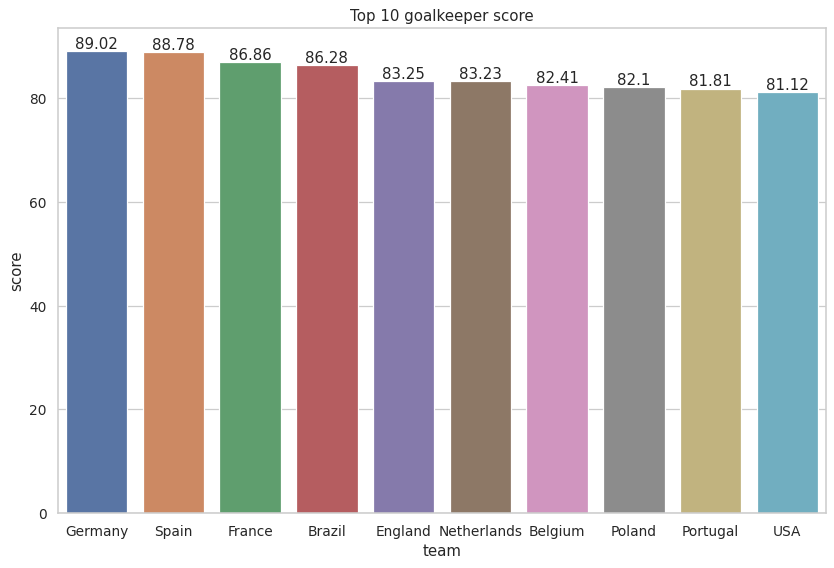

In [ ]:
defense_score = []
midfield_score = []
goalkeeper_score = []
for x in wc_2022:
    # Calculate the average goalkeeper score , Defense score and Midfield score for the team, regardless of whether they were the home or away team
    gk_score = np.round((df[df['home_team'] == x]['home_team_goalkeeper_score'].mean() + df[df['away_team'] == x]['away_team_goalkeeper_score'].mean()) / 2, 2)
    def_score = np.round((df[df['home_team'] == x]['home_team_mean_defense_score'].mean() + df[df['away_team'] == x]['away_team_mean_defense_score'].mean()) / 2, 2)
    mid_score = np.round((df[df['home_team'] == x]['home_team_mean_midfield_score'].mean() + df[df['away_team'] == x]['away_team_mean_midfield_score'].mean()) / 2, 2)
    # Append the goalkeeper score to the list
    goalkeeper_score.append(gk_score)
    defense_score.append(def_score)
    midfield_score.append(mid_score)

# Create a DataFrame with the teams and their goalkeeper scores
goalkeeper_scores = pd.DataFrame({'Team': wc_2022, 'Gk score': goalkeeper_score})
defense_scores = pd.DataFrame({'Team': wc_2022, 'Defense score': defense_score})
midfield_scores = pd.DataFrame({'Team': wc_2022, 'Midfield score': midfield_score})

# Sort the DataFrame by goalkeeper score in descending order and reset the index
goalkeeper_scores = goalkeeper_scores.sort_values('Gk score', ascending = False).reset_index(drop=True)
defense_scores = defense_scores.sort_values('Defense score', ascending = False).reset_index(drop=True)
midfield_scores = midfield_scores.sort_values('Midfield score', ascending = False).reset_index(drop=True)

# Adjust the index to start from 1 instead of 0
goalkeeper_scores.index += 1
defense_scores.index += 1
midfield_scores.index += 1


plt.figure(figsize=(11,7), dpi =90)
ax = sns.barplot(data=goalkeeper_scores[:10], x='Team', y = 'Gk score')
ax.bar_label(ax.containers[0])
plt.xlabel('team')
plt.ylabel('score')
plt.title('Top 10 goalkeeper score')

Text(0.5, 1.0, 'Top 10 Defense score')

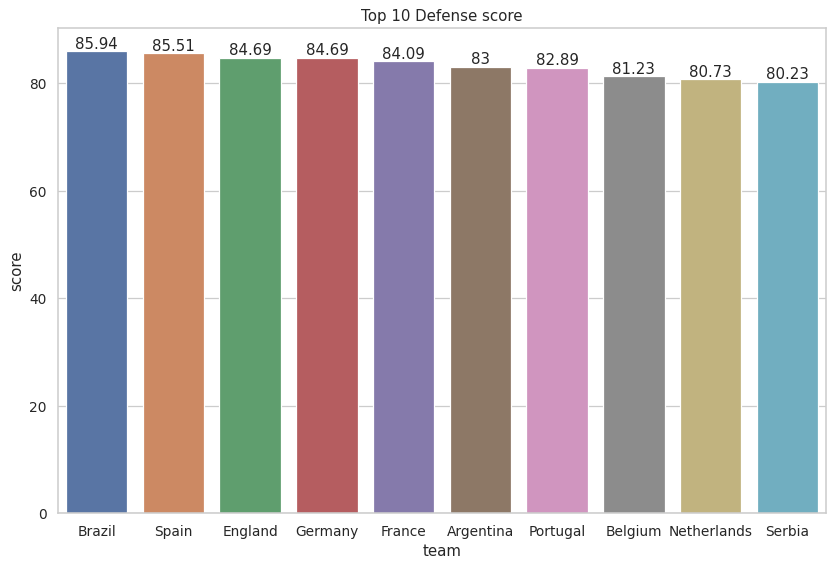

In [ ]:
plt.figure(figsize=(11,7), dpi =90)
ax = sns.barplot(data=defense_scores[:10], x='Team', y = 'Defense score')
ax.bar_label(ax.containers[0])
plt.xlabel('team')
plt.ylabel('score')
plt.title('Top 10 Defense score')

Text(0.5, 1.0, 'Top 10 Midfield score')

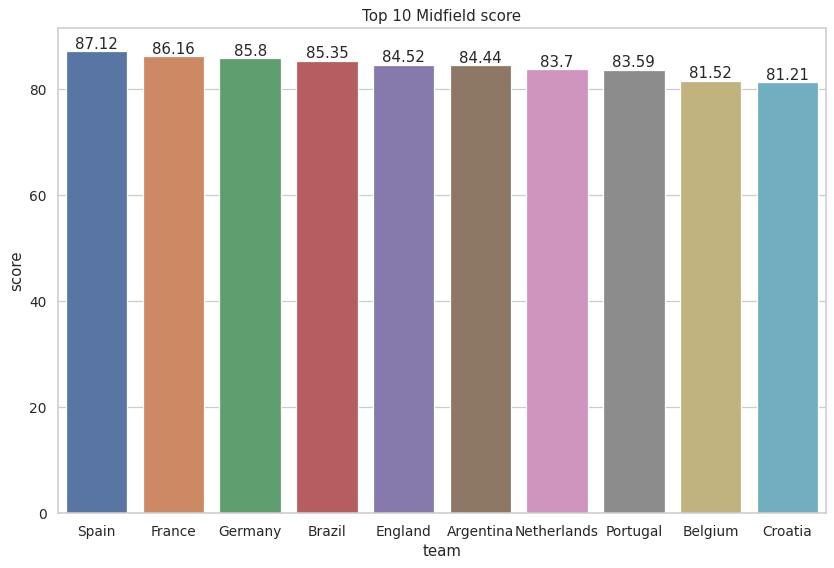

In [ ]:
plt.figure(figsize=(11,7), dpi =90)
ax = sns.barplot(data=midfield_scores[:10], x='Team', y = 'Midfield score')
ax.bar_label(ax.containers[0])
plt.xlabel('team')
plt.ylabel('score')
plt.title('Top 10 Midfield score')

#Which are the top 15 teams with a high win percentage?

In [ ]:
hwins, hdraws, hloses = [], [], []
awins, adraws, aloses = [], [], []

for team in wc_2022:
    # Calculate the home and away win, draw, and lose counts for the team

    home_win = df[(df['home_team'] == team) & (df['home_team_result'] == 'Win')].shape[0]
    home_draw = df[(df['home_team'] == team) & (df['home_team_result'] == 'Draw')].shape[0]
    home_lose = df[(df['home_team'] == team) & (df['home_team_result'] == 'Lose')].shape[0]
    away_win = df[(df['away_team'] == team) & (df['home_team_result'] == 'Lose')].shape[0]  # Away win means home lose
    away_draw = df[(df['away_team'] == team) & (df['home_team_result'] == 'Draw')].shape[0]
    away_lose = df[(df['away_team'] == team) & (df['home_team_result'] == 'Win')].shape[0]  # Away lose means home win
    hwins.append(home_win)
    hdraws.append(home_draw)
    hloses.append(home_lose)
    awins.append(away_win)
    adraws.append(away_draw)
    aloses.append(away_lose)

# Calculate the total win, draw, and lose counts
wins = np.add(hwins, awins)
draws = np.add(hdraws, adraws)
loses = np.add(hloses, aloses)

# Create a DataFrame with the teams and their win, draw, and lose counts
win_draw_lose = pd.DataFrame({'Team': wc_2022, 'Win': wins, 'Draw': draws, 'Lose': loses,
'Home win': hwins, 'Home draw': hdraws, 'Home lose': hloses,
'Away win': awins, 'Away draw': adraws, 'Away lose': aloses})

# Insert columns for the total, total home, and total away counts
win_draw_lose.insert(1, 'Total', win_draw_lose['Win'] + win_draw_lose['Draw'] + win_draw_lose['Lose'])
win_draw_lose.insert(8, 'Total Home', win_draw_lose['Home win'] + win_draw_lose['Home draw'] + win_draw_lose['Home lose'])
win_draw_lose.insert(12, 'Total Away', win_draw_lose['Away win'] + win_draw_lose['Away draw'] + win_draw_lose['Away lose'])

# Calculate the win, draw, and lose percentages for total, home, and away
win_draw_lose['Win %'] = np.around(100 * win_draw_lose['Win'] / win_draw_lose['Total'], 2)
win_draw_lose['Draw %'] = np.round(100 * win_draw_lose['Draw'] / win_draw_lose['Total'], 2)
win_draw_lose['Lose %'] = np.round(100 * win_draw_lose['Lose'] / win_draw_lose['Total'], 2)
win_draw_lose['Home Win %'] = np.round(100 * win_draw_lose['Home win'] / win_draw_lose['Total Home'], 2)
win_draw_lose['Home Draw %'] = np.round(100 * win_draw_lose['Home draw'] / win_draw_lose['Total Home'], 2)
win_draw_lose['Home Lose %'] = np.round(100 * win_draw_lose['Home lose'] / win_draw_lose['Total Home'], 2)
win_draw_lose['Away Win %'] = np.round(100 * win_draw_lose['Away win'] / win_draw_lose['Total Away'], 2)
win_draw_lose['Away Draw %'] = np.round(100 * win_draw_lose['Away draw'] / win_draw_lose['Total Away'], 2)
win_draw_lose['Away Lose %'] = np.round(100 * win_draw_lose['Away lose'] / win_draw_lose['Total Away'], 2)

# Sort the DataFrame by win percentage in descending order and reset the index
win_draw_lose = win_draw_lose.sort_values('Win %', ascending=False).reset_index(drop=True)
win_draw_lose.index += 1
win_draw_lose.style.set_properties(**{'background-color': 'yellow', 'color': 'black'}, subset=['Home win', 'Home draw', 'Home lose', 'Away win', 'Away draw', 'Away lose'])

,Team,Total,Win,Draw,Lose,Home win,Home draw,Home lose,Total Home,Away win,Away draw,Away lose,Total Away,Win %,Draw %,Lose %,Home Win %,Home Draw %,Home Lose %,Away Win %,Away Draw %,Away Lose %
1,Brazil,433,301,76,56,181,31,21,233,120,45,35,200,69.520000,17.550000,12.930000,77.680000,13.300000,9.010000,60.000000,22.500000,17.500000
2,Spain,354,246,64,44,145,27,17,189,101,37,27,165,69.490000,18.080000,12.430000,76.720000,14.290000,8.990000,61.210000,22.420000,16.360000
3,France,370,230,83,57,145,44,32,221,85,39,25,149,62.160000,22.430000,15.410000,65.610000,19.910000,14.480000,57.050000,26.170000,16.780000
4,Germany,390,240,82,68,139,44,36,219,101,38,32,171,61.540000,21.030000,17.440000,63.470000,20.090000,16.440000,59.060000,22.220000,18.710000
5,IR Iran,366,217,79,70,133,31,27,191,84,48,43,175,59.290000,21.580000,19.130000,69.630000,16.230000,14.140000,48.000000,27.430000,24.570000
6,Netherlands,340,201,74,65,119,40,33,192,82,34,32,148,59.120000,21.760000,19.120000,61.980000,20.830000,17.190000,55.410000,22.970000,21.620000
7,Portugal,336,198,79,59,123,37,24,184,75,42,35,152,58.930000,23.510000,17.560000,66.850000,20.110000,13.040000,49.340000,27.630000,23.030000
8,Argentina,367,216,79,72,130,36,24,190,86,43,48,177,58.860000,21.530000,19.620000,68.420000,18.950000,12.630000,48.590000,24.290000,27.120000
9,England,334,196,75,63,124,38,32,194,72,37,31,140,58.680000,22.460000,18.860000,63.920000,19.590000,16.490000,51.430000,26.430000,22.140000
10,Croatia,320,172,79,69,92,38,24,154,80,41,45,166,53.750000,24.690000,21.560000,59.740000,24.680000,15.580000,48.190000,24.700000,27.110000


Text(0.5, 1.0, 'top 15 teams with highest win percentage')

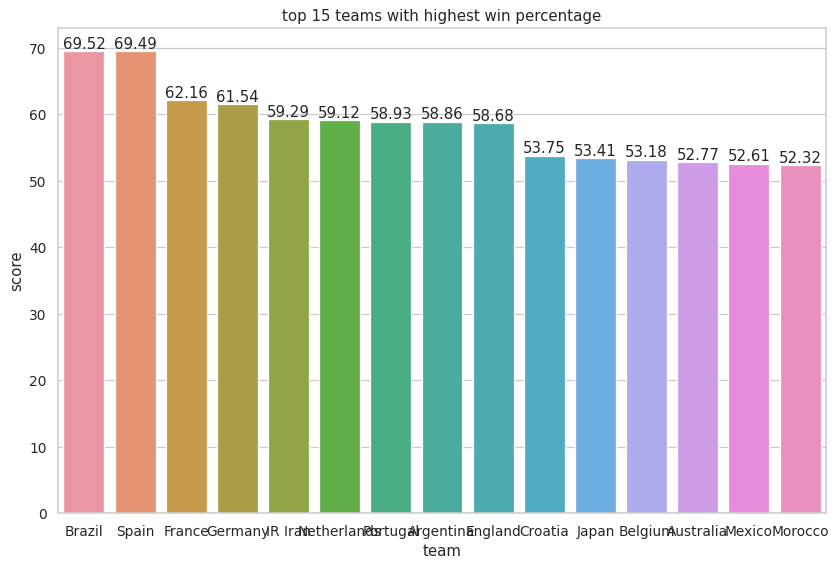

In [ ]:
plt.figure(figsize=(11,7), dpi = 90)
ax = sns.barplot(data=win_draw_lose[:15], x='Team', y='Win %')
ax.bar_label(ax.containers[0])
plt.xlabel("team")
plt.ylabel('score')
plt.title('top 15 teams with highest win percentage')

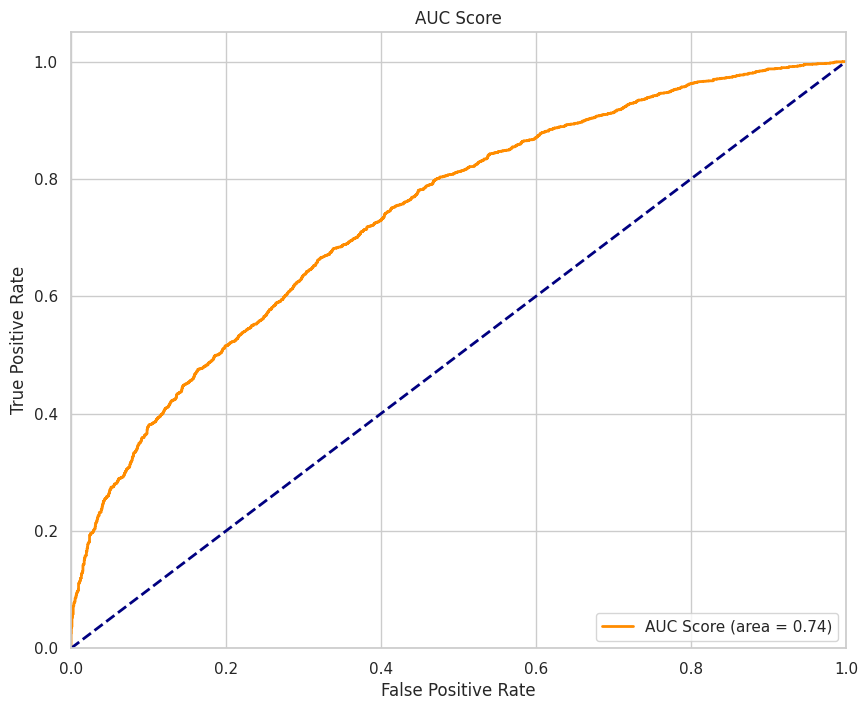

In [ ]:
from sklearn import linear_model
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

df['rank_difference'] = df['home_team_fifa_rank'] - df['away_team_fifa_rank']
df['average_rank'] = (df['home_team_fifa_rank'] + df['away_team_fifa_rank']) / 2
df['point_difference'] = df['home_team_total_fifa_points'] - df['away_team_total_fifa_points']
df['score_difference'] = df['home_team_score'] - df['away_team_score']
df['is_won'] = df['score_difference'] > 0
df['is_stake'] = df['tournament'] != 'Friendly'

X, y = df.loc[:, ['average_rank', 'rank_difference', 'point_difference']], df['is_won']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0,stratify=y)
logreg = linear_model.LogisticRegression(C=1e-5)
features = PolynomialFeatures(degree=2)

# Create a pipeline that first transforms the features to polynomial features, then fits a logistic regression model
model = Pipeline([('polynomial_features', features), ('logistic_regression', logreg)])
model = model.fit(X_train, y_train)
fpr, tpr,_ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])


plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC Score (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC Score')
plt.legend(loc="lower right")
plt.show()

# General interpretation guide for AUC scores:

1) >0.8: Very good performance

2) 0.7-0.8: Good performance

3) 0.5-0.7: OK performance

4) 0.5: As good as random choice



# Winner prediction FIFA world cup 2022


100%|██████████| 1000/1000 [00:13<00:00, 74.68it/s]


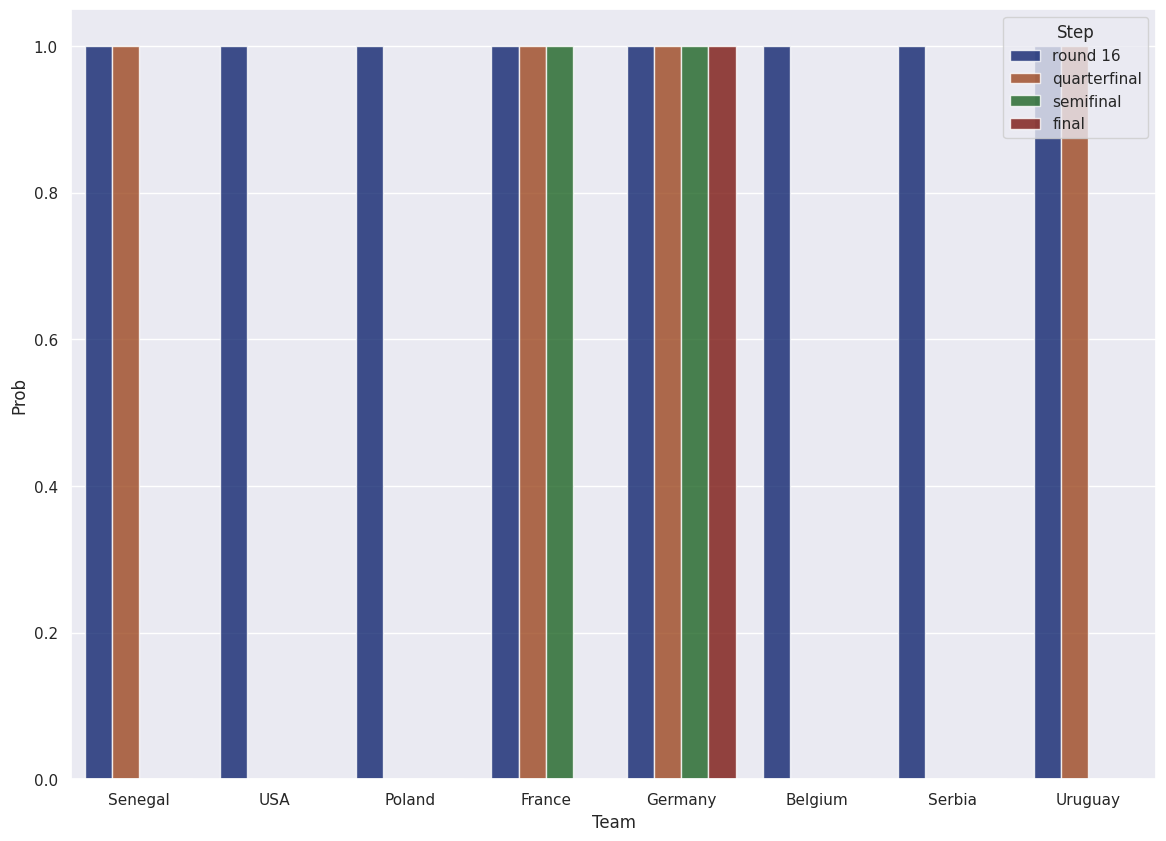

In [ ]:
from tqdm import tqdm

# Assuming that the DataFrame is named df
world_cup_rankings_home = df[['home_team', 'home_team_fifa_rank', 'home_team_total_fifa_points']]
world_cup_rankings_away = df[['away_team', 'away_team_fifa_rank', 'away_team_total_fifa_points']]

# Group by team and calculate the mean
world_cup_rankings_home = world_cup_rankings_home.groupby('home_team').mean()
world_cup_rankings_away = world_cup_rankings_away.groupby('away_team').mean()

# List of teams participating in the World Cup
candidates = ['Senegal', 'Netherlands', 'England', 'USA', 'Argentina', 'Poland', 'France', 'Denmark', "Spain", 'Germany', 'Belgium', 'Croatia', 'Brazil', 'Serbia', 'Portugal', 'Uruguay']
finals = ['round of 8', 'quarterfinal', 'semifinal', 'final']

simulation_results_winners = list()
simulation_results_round16 = list()
simulation_df_round16= list()
simulation_results_quarterfinal = list()
simulation_df_quarterfinal = list()
simulation_results_semifinal = list()
simulation_df_semifinal = list()

n_simulations = 1000 #Number of Simulations

for i in tqdm(range(n_simulations)):
    for f in finals:
        iterations = int(len(candidates) / 2)
        winners = []
        prob = []
        for i in range(iterations):
            home = candidates[i*2]
            away = candidates[i*2+1]
            row = pd.DataFrame(np.array([[np.nan, np.nan, True]]), columns=X_test.columns)
            home_rank = world_cup_rankings_home.loc[home, 'home_team_fifa_rank']
            home_points = world_cup_rankings_home.loc[home, 'home_team_total_fifa_points']
            opp_rank = world_cup_rankings_away.loc[away, 'away_team_fifa_rank']
            opp_points = world_cup_rankings_away.loc[away, 'away_team_total_fifa_points']
            row['average_rank'] = (home_rank + opp_rank) / 2
            row['rank_difference'] = home_rank - opp_rank
            row['point_difference'] = home_points - opp_points
            home_win_prob = model.predict_proba(row)[:,1][0]
            simulated_outcome = np.random.binomial(1, home_win_prob)
            if simulated_outcome <= 0.5:
                winners.append(away)
                prob.append(1 - simulated_outcome)
            else:
                winners.append(home)
                prob.append(simulated_outcome)
        if f == 'round of 8':
            simulation_df_round16.append(pd.DataFrame(list(zip(['round 16']*8, winners, prob)), columns = ['Step', 'Team', 'Prob']))
            simulation_results_round16.append(winners)
        elif f == 'quarterfinal':
            simulation_df_quarterfinal.append(pd.DataFrame(list(zip(['quarterfinal']*4, winners, prob)), columns = ['Step', 'Team', 'Prob']))
            simulation_results_quarterfinal.append(winners)
        elif f == 'semifinal':
            simulation_df_semifinal.append(pd.DataFrame(list(zip(['semifinal']*2, winners, prob)), columns = ['Step', 'Team', 'Prob']))
            simulation_results_semifinal.append(winners)
        elif f == 'final':
            simulation_results_winners.append(pd.DataFrame(list(zip(['final'], winners, prob)), columns = ['Step', 'Team', 'Prob']))
        candidates = winners

df_candidates_round16 = pd.concat(simulation_df_round16)
df_candidates_quarterfinal = pd.concat(simulation_df_quarterfinal)
df_candidates_semifinal = pd.concat(simulation_df_semifinal)
df_candidates_final = pd.concat(simulation_results_winners)
df_results = pd.concat([df_candidates_round16, df_candidates_quarterfinal, df_candidates_semifinal, df_candidates_final])


# Visualize the results
sns.set_theme(style='whitegrid')
sns.set(rc={'figure.figsize': (14,10)})

# Create the bar plot
g = sns.barplot(data=df_results, x="Team", y='Prob', hue="Step", estimator=sum, palette='dark', alpha=0.8)


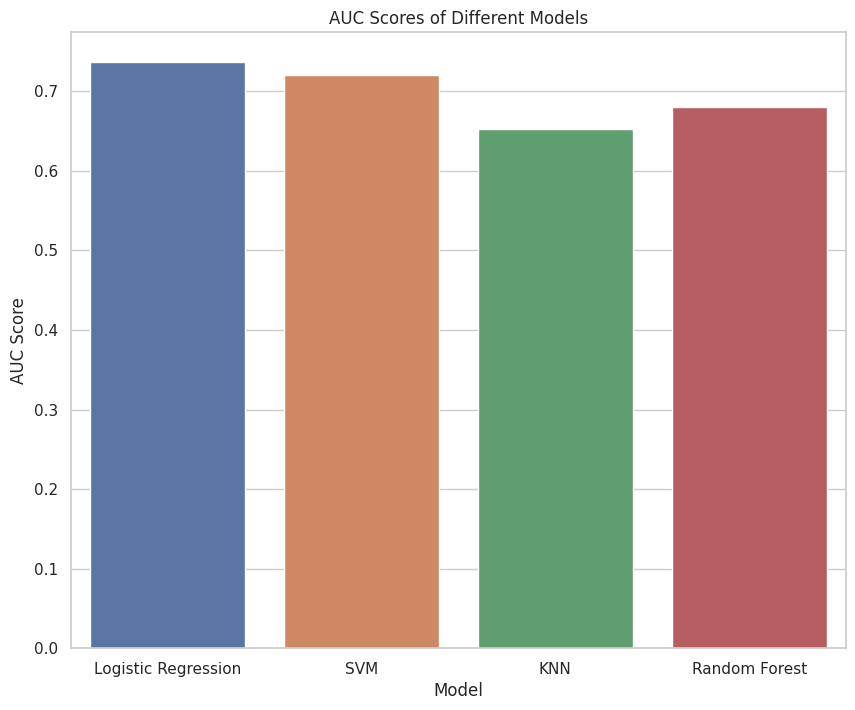

In [ ]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
logreg = linear_model.LogisticRegression(C=1e-5)
svm_model = svm.SVC(probability=True)
knn = KNeighborsClassifier(n_neighbors=3)
rf = RandomForestClassifier(random_state=42)

# Create a list of models
models = [logreg, svm_model, knn, rf]
model_names = ['Logistic Regression', 'SVM', 'KNN', 'Random Forest']
auc_scores = []
accuracies = []

for model in models:
    # Create a pipeline that first transforms the features to polynomial features, then fits the model
    model_pipeline = Pipeline([('polynomial_features', features), ('model', model)])
    model_pipeline = model_pipeline.fit(X_train, y_train)  # Fit the model

    # Calculate the false positive rate, true positive rate, and thresholds for the ROC curve
    fpr, tpr,_ = roc_curve(y_test, model_pipeline.predict_proba(X_test)[:,1])
    roc_auc = roc_auc_score(y_test, model_pipeline.predict_proba(X_test)[:,1])    # Calculate the area under the ROC curve
    auc_scores.append(roc_auc)
    accuracy = accuracy_score(y_test, model_pipeline.predict(X_test))    # Calculate the accuracy of the model
    accuracies.append(accuracy)

# Plot the AUC scores
plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
sns.barplot(x=model_names, y=auc_scores)
plt.xlabel('Model')
plt.ylabel('AUC Score')
plt.title('AUC Scores of Different Models')
plt.show()

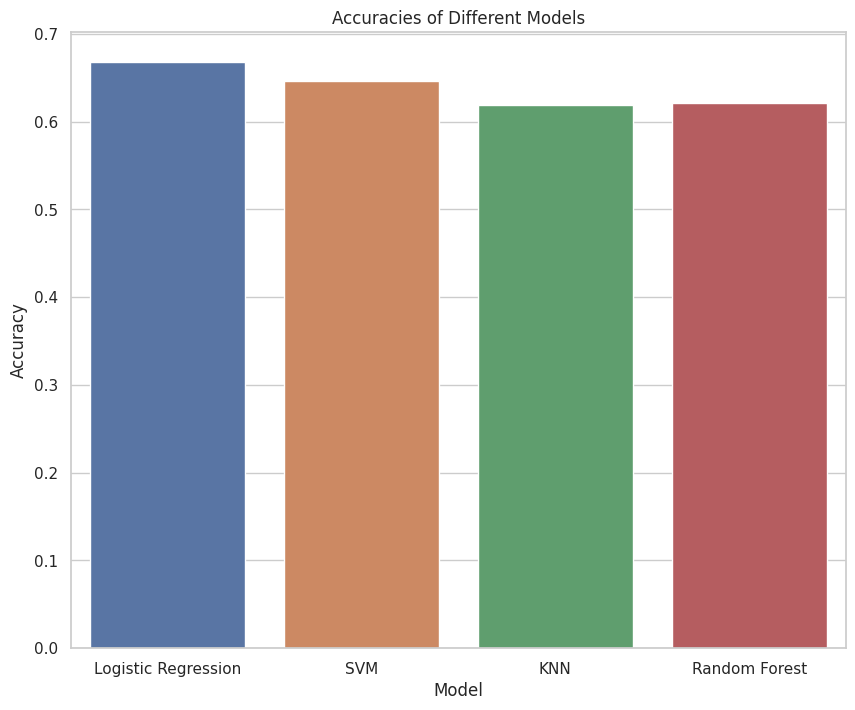

In [ ]:
# Plot the accuracies
plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
sns.barplot(x=model_names, y=accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracies of Different Models')
plt.show()
